In [1]:
import pandas as pd
import numpy as np 
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
combine = pd.read_csv('log.csv')
train_df, test_df = train_test_split(combine, train_size = 0.8)

In [3]:
print(train_df.columns.values)

['step' 'type' 'amount' 'nameOrig' 'oldbalanceOrg' 'newbalanceOrig'
 'nameDest' 'oldbalanceDest' 'newbalanceDest' 'isFraud' 'isFlaggedFraud']


In [4]:
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2928423,229,PAYMENT,1871.05,C495339703,0.0,0.00,M1854586724,0.00,0.00,0,0
3587230,262,PAYMENT,9264.97,C1177197787,3858.0,0.00,M1545828311,0.00,0.00,0,0
4901224,349,CASH_IN,327328.17,C1465291106,48489.0,375817.17,C1989147208,2944158.66,2616830.49,0,0
2183739,185,PAYMENT,5177.17,C2038861671,0.0,0.00,M1207074176,0.00,0.00,0,0
5582785,393,PAYMENT,15539.33,C1129012206,996.0,0.00,M986864607,0.00,0.00,0,0


In [5]:
train_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1005833,46,PAYMENT,22077.71,C1437554252,0.0,0.0,M320599053,0.00,0.00,0,0
4091916,301,CASH_OUT,257051.35,C1576356358,0.0,0.0,C484017606,1337263.43,1594314.78,0,0
5355326,375,CASH_OUT,195409.33,C2037768261,20912.0,0.0,C1197600767,120281.82,315691.15,0,0
5638254,396,CASH_OUT,282489.24,C1671643430,20909.0,0.0,C1809791467,0.00,282489.24,0,0
3176308,238,PAYMENT,20529.60,C1349549478,24757.0,4227.4,M1414772307,0.00,0.00,0,0


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5090096 entries, 2928423 to 3176308
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 466.0+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272524 entries, 3405741 to 4568148
Data columns (total 11 columns):
step              1272524 non-null int64
type              1272524 non-null object
amount            1272524 non-null float64
nameOrig          1272524 non-null object
oldbalanceOrg     1272524 non-null float64
newbalanceOrig    1272524 non-null float64
nameDest          1272524 non-null object
oldbalanceDest    1272524 non-null float64
newbalanceDest    1272524 non-null float6

In [7]:
train_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06
mean,2.433736e+02,1.799009e+05,8.340194e+05,8.552609e+05,1.101051e+06,1.225333e+06,1.289170e-03,2.553979e-06
std,1.423139e+02,6.043581e+05,2.887321e+06,2.923183e+06,3.413888e+06,3.686933e+06,3.588187e-02,1.598116e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.339650e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.497521e+04,1.422800e+04,0.000000e+00,1.329557e+05,2.147370e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,2.087525e+05,1.073640e+05,1.442611e+05,9.430190e+05,1.112123e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
train_df.describe(include=['O'])

,type,nameOrig,nameDest
count,5090096,5090096,5090096
unique,5,5084171,2265771
top,CASH_OUT,C1462946854,C1286084959
freq,1790411,3,98


In [9]:
train_df[['type','isFraud']].groupby(['type'], as_index=False).mean().sort_values(by='isFraud',ascending=False)

,type,isFraud
4,TRANSFER,0.007668
1,CASH_OUT,0.001838
0,CASH_IN,0.000000
2,DEBIT,0.000000
3,PAYMENT,0.000000


In [10]:
train_df[['isFlaggedFraud','isFraud']].groupby(['isFlaggedFraud'], as_index=False).mean().sort_values(by='isFraud',ascending=False)

,isFlaggedFraud,isFraud
1,1,1.000000
0,0,0.001287


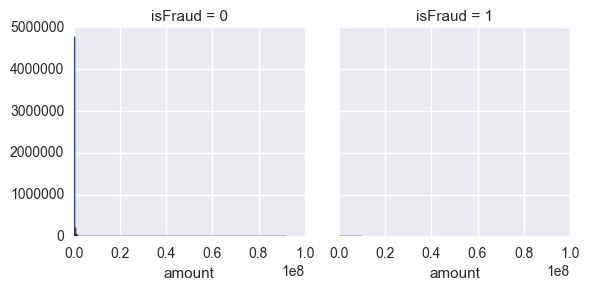

In [11]:
g = sns.FacetGrid(train_df, col = 'isFraud')
g.map(plt.hist, 'amount', bins=200)

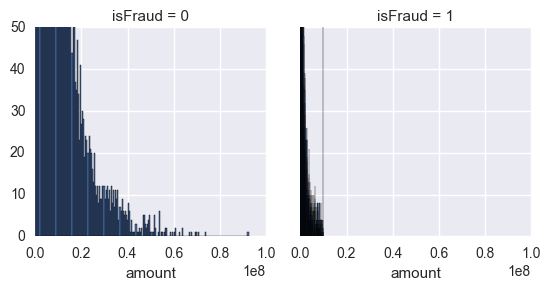

In [12]:
g = sns.FacetGrid(train_df, col = 'isFraud')
g.map(plt.hist, 'amount', bins=200).set(ylim=(0,50))

In [13]:
train_df[['nameOrig','isFraud']].groupby(['nameOrig'], as_index=False).mean().sort_values(by='isFraud',ascending=False).head()

,nameOrig,isFraud
3047102,C225560210,1.0
4103768,C627366177,1.0
4121764,C634268681,1.0
68690,C1026137221,1.0
822184,C1313129154,1.0


In [14]:
train_df[['nameDest','isFraud']].groupby(['nameDest'], as_index=False).mean().sort_values(by='isFraud',ascending=False).head()

,nameDest,isFraud
287356,C2017082627,1.0
412007,C526059376,1.0
20001,C1070752768,1.0
56722,C1200267069,1.0
238226,C1843224503,1.0


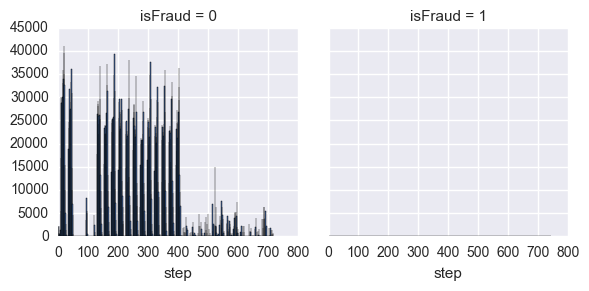

In [15]:
g = sns.FacetGrid(train_df, col = 'isFraud')
g.map(plt.hist, 'step', bins=720)

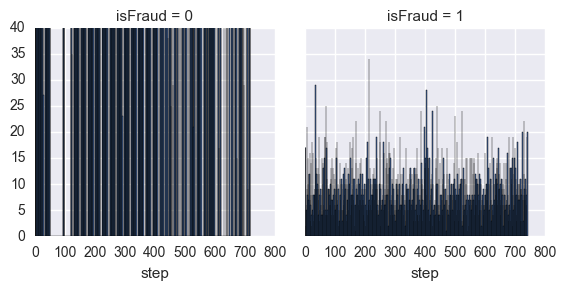

In [16]:
g = sns.FacetGrid(train_df, col = 'isFraud')
g.map(plt.hist, 'step', bins=720).set(ylim=(0,40))

In [17]:
train_df[['amount','isFraud']].loc[train_df['isFraud']==1].sort_values(by='amount',ascending=False)

,amount,isFraud
6266406,10000000.00,1
6362583,10000000.00,1
6019704,10000000.00,1
5987923,10000000.00,1
6296010,10000000.00,1
5563508,10000000.00,1
3247294,10000000.00,1
3760282,10000000.00,1
6296013,10000000.00,1
5179012,10000000.00,1


In [18]:
train_df = train_df.drop(['isFlaggedFraud'],axis = 1)
test_df = test_df.drop(['isFlaggedFraud'],axis = 1)
combine=[train_df, test_df]

In [19]:
train_df['nameOrig'] = train_df['nameOrig'].map(lambda x: x.rstrip('1234567890')).astype(str)
train_df['nameDest'] = train_df['nameDest'].map(lambda x: x.rstrip('1234567890')).astype(str)
test_df['nameOrig'] = test_df['nameOrig'].map(lambda x: x.rstrip('1234567890')).astype(str)
test_df['nameDest'] = test_df['nameDest'].map(lambda x: x.rstrip('1234567890')).astype(str)

combine=[train_df, test_df]
#data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))

In [20]:
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2928423,229,PAYMENT,1871.05,C,0.0,0.00,M,0.00,0.00,0
3587230,262,PAYMENT,9264.97,C,3858.0,0.00,M,0.00,0.00,0
4901224,349,CASH_IN,327328.17,C,48489.0,375817.17,C,2944158.66,2616830.49,0
2183739,185,PAYMENT,5177.17,C,0.0,0.00,M,0.00,0.00,0
5582785,393,PAYMENT,15539.33,C,996.0,0.00,M,0.00,0.00,0


In [21]:
mapping = {'C':1, 'M':2}
for dataset in combine:
    dataset['nameOrig'] = dataset['nameOrig'].map(mapping)
    dataset['nameDest'] = dataset['nameDest'].map(mapping)
    dataset['nameOrig'] = dataset['nameOrig'].fillna(0)
    dataset['nameDest'] = dataset['nameDest'].fillna(0)
    
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2928423,229,PAYMENT,1871.05,1,0.0,0.00,2,0.00,0.00,0
3587230,262,PAYMENT,9264.97,1,3858.0,0.00,2,0.00,0.00,0
4901224,349,CASH_IN,327328.17,1,48489.0,375817.17,1,2944158.66,2616830.49,0
2183739,185,PAYMENT,5177.17,1,0.0,0.00,2,0.00,0.00,0
5582785,393,PAYMENT,15539.33,1,996.0,0.00,2,0.00,0.00,0


In [22]:
type_mapping = {'TRANSFER' :1, 'CASH_OUT':2, 'CASH_IN':3 ,'PAYMENT':4, 'DEBIT':5}
for dataset in combine:
    dataset['type'] = dataset['type'].map(type_mapping)
    
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2928423,229,4,1871.05,1,0.0,0.00,2,0.00,0.00,0
3587230,262,4,9264.97,1,3858.0,0.00,2,0.00,0.00,0
4901224,349,3,327328.17,1,48489.0,375817.17,1,2944158.66,2616830.49,0
2183739,185,4,5177.17,1,0.0,0.00,2,0.00,0.00,0
5582785,393,4,15539.33,1,996.0,0.00,2,0.00,0.00,0


In [23]:
train_df['StepBand'] = pd.cut(train_df['step'],30)
train_df[['StepBand','isFraud']].groupby(['StepBand'], as_index=False).mean().sort_values(by='StepBand',ascending=True)

,StepBand,isFraud
0,"(0.258, 25.733]",0.000510
1,"(25.733, 50.467]",0.000652
2,"(50.467, 75.2]",1.000000
3,"(75.2, 99.933]",0.008934
4,"(99.933, 124.667]",0.024837
5,"(124.667, 149.4]",0.000612
6,"(149.4, 174.133]",0.000695
7,"(174.133, 198.867]",0.000584
8,"(198.867, 223.6]",0.000647
9,"(223.6, 248.333]",0.000713


In [24]:
train_df['StepBand2'] = train_df['step'] % 24
train_df[['StepBand2','isFraud']].groupby(['StepBand2'], as_index=False).mean().sort_values(by='StepBand2',ascending=True)

,StepBand2,isFraud
0,0,0.004226
1,1,0.013312
2,2,0.039412
3,3,0.167284
4,4,0.213182
5,5,0.226344
6,6,0.108555
7,7,0.036574
8,8,0.013420
9,9,0.001170


In [25]:
train_df['StepBand3'] = pd.cut(train_df['StepBand2'],4)
train_df[['StepBand3','isFraud']].groupby(['StepBand3'], as_index=False).mean().sort_values(by='StepBand3',ascending=True)

,StepBand3,isFraud
0,"(-0.023, 5.75]",0.017670
1,"(5.75, 11.5]",0.001746
2,"(11.5, 17.25]",0.000775
3,"(17.25, 23]",0.000863


In [26]:
train_df = train_df.drop(['StepBand'], axis=1)

train_df = train_df.drop(['StepBand3'], axis=1)
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,StepBand2
2928423,229,4,1871.05,1,0.0,0.00,2,0.00,0.00,0,13
3587230,262,4,9264.97,1,3858.0,0.00,2,0.00,0.00,0,22
4901224,349,3,327328.17,1,48489.0,375817.17,1,2944158.66,2616830.49,0,13
2183739,185,4,5177.17,1,0.0,0.00,2,0.00,0.00,0,17
5582785,393,4,15539.33,1,996.0,0.00,2,0.00,0.00,0,9


In [27]:
train_df['timeQ'] = train_df['StepBand2']
train_df = train_df.drop(['StepBand2'], axis=1)
test_df['timeQ'] = test_df['step'] % 24
combine = [train_df,test_df]
for dataset in combine:
    dataset.loc[dataset['timeQ'] <= 6, 'timeQ']=0
    dataset.loc[(dataset['timeQ']>6)&(dataset['timeQ']<=12),'timeQ']=1
    dataset.loc[(dataset['timeQ']>12)&(dataset['timeQ']<=18),'timeQ']=2
    dataset.loc[(dataset['timeQ']>18)&(dataset['timeQ']<=24),'timeQ']=3
    
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,timeQ
2928423,229,4,1871.05,1,0.0,0.00,2,0.00,0.00,0,2
3587230,262,4,9264.97,1,3858.0,0.00,2,0.00,0.00,0,3
4901224,349,3,327328.17,1,48489.0,375817.17,1,2944158.66,2616830.49,0,2
2183739,185,4,5177.17,1,0.0,0.00,2,0.00,0.00,0,2
5582785,393,4,15539.33,1,996.0,0.00,2,0.00,0.00,0,1


In [28]:
train_df['date'] = train_df['step'] % 168
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,timeQ,date
2928423,229,4,1871.05,1,0.0,0.00,2,0.00,0.00,0,2,61
3587230,262,4,9264.97,1,3858.0,0.00,2,0.00,0.00,0,3,94
4901224,349,3,327328.17,1,48489.0,375817.17,1,2944158.66,2616830.49,0,2,13
2183739,185,4,5177.17,1,0.0,0.00,2,0.00,0.00,0,2,17
5582785,393,4,15539.33,1,996.0,0.00,2,0.00,0.00,0,1,57


In [29]:
train_df['DateBand'] = pd.cut(train_df['date'],7)
train_df[['DateBand','isFraud']].groupby(['DateBand'], as_index=False).mean().sort_values(by='DateBand',ascending=True)

,DateBand,isFraud
0,"(-0.167, 23.857]",0.000864
1,"(23.857, 47.714]",0.000989
2,"(47.714, 71.571]",0.001683
3,"(71.571, 95.429]",0.001981
4,"(95.429, 119.286]",0.002735
5,"(119.286, 143.143]",0.001114
6,"(143.143, 167]",0.001216


In [30]:
train_df = train_df.drop(['DateBand'], axis=1)
test_df['date'] = test_df['step'] % 168
combine = [train_df,test_df]
for dataset in combine:
    dataset.loc[dataset['date'] <= 24, 'date']=0
    dataset.loc[(dataset['date']>24)&(dataset['date']<=48),'date']=1
    dataset.loc[(dataset['date']>48)&(dataset['date']<=72),'date']=2
    dataset.loc[(dataset['date']>72)&(dataset['date']<=96),'date']=3
    dataset.loc[(dataset['date']>96)&(dataset['date']<=120),'date']=4
    dataset.loc[(dataset['date']>120)&(dataset['date']<=144),'date']=5
    dataset.loc[(dataset['date']>144)&(dataset['date']<=168),'date']=6
    
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,timeQ,date
2928423,229,4,1871.05,1,0.0,0.00,2,0.00,0.00,0,2,2
3587230,262,4,9264.97,1,3858.0,0.00,2,0.00,0.00,0,3,3
4901224,349,3,327328.17,1,48489.0,375817.17,1,2944158.66,2616830.49,0,2,0
2183739,185,4,5177.17,1,0.0,0.00,2,0.00,0.00,0,2,0
5582785,393,4,15539.33,1,996.0,0.00,2,0.00,0.00,0,1,2


In [31]:
train_df = train_df.drop(['step'], axis=1)
test_df = test_df.drop(['step'], axis =1)
combine=[train_df,test_df]

In [32]:
train_df.head()
test_df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,timeQ,date
3405741,4,1230.30,1,523503.00,522272.70,2,0.00,0.00,0,2,3
4310576,4,39769.35,1,236430.59,196661.24,2,0.00,0.00,0,3,5
5805026,4,22553.15,1,2067.00,0.00,2,0.00,0.00,0,2,2
348927,2,64422.40,1,3187.00,0.00,1,297989.15,362411.56,0,2,0
4980059,4,5245.46,1,100611.92,95366.46,2,0.00,0.00,0,2,0


In [33]:
X_train = train_df.drop('isFraud', axis=1)
Y_train = train_df['isFraud']
X_test = test_df.drop('isFraud',axis=1)
Y_test = test_df['isFraud']

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test)* 100, 2)
acc_log

99.799999999999997

In [35]:
accuracy_score(Y_test, Y_pred)

0.99802125539479014

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(8))
coeff_df.columns =['Features']
coeff_df['Correlation']=pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Features,Correlation
3,oldbalanceOrg,8.575034e-04
6,oldbalanceDest,7.588516e-07
7,newbalanceDest,-2.666800e-06
2,nameOrig,-7.732211e-05
5,nameDest,-1.471607e-04
8,timeQ,-1.593120e-04
9,date,-1.861852e-04
0,type,-2.975226e-04
1,amount,-8.533967e-04
4,newbalanceOrig,-9.360999e-04


In [ ]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test)*100,2)
acc_svc

In [ ]:
accuracy_score(Y_test, Y_pred)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn
accuracy_score(Y_test, Y_pred)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian
accuracy_score(Y_test, Y_pred)

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron
accuracy_score(Y_test, Y_pred)

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc
accuracy_score(Y_test, Y_pred)

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd
accuracy_score(Y_test, Y_pred)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree
accuracy_score(Y_test, Y_pred)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest
accuracy_score(Y_test, Y_pred)

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)